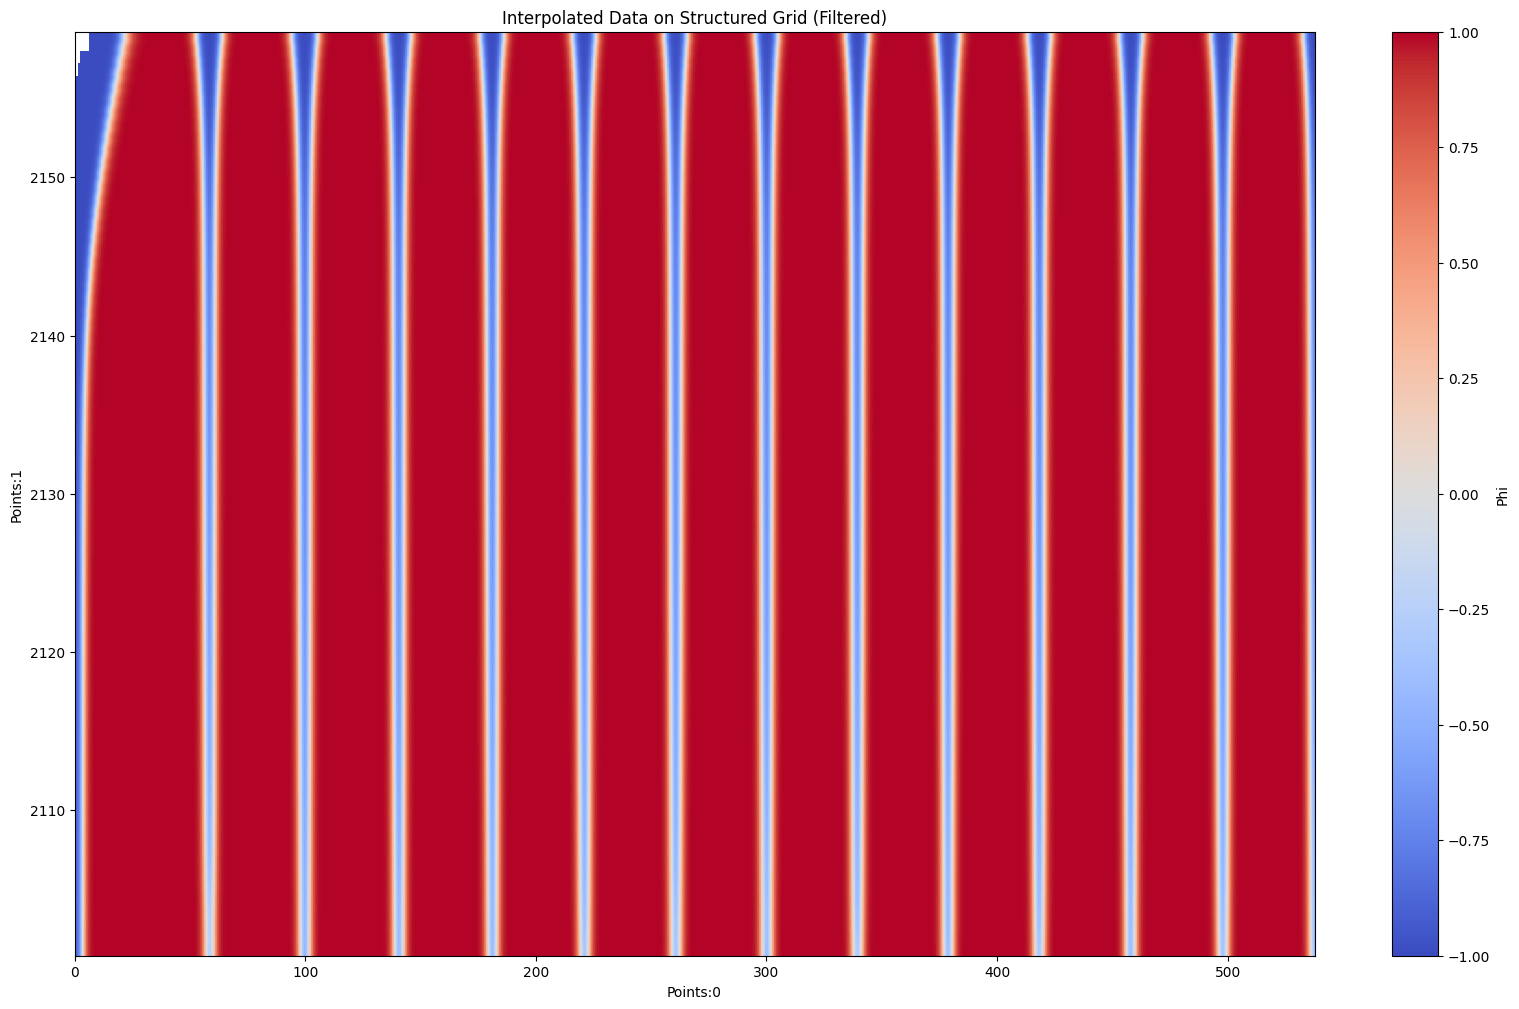

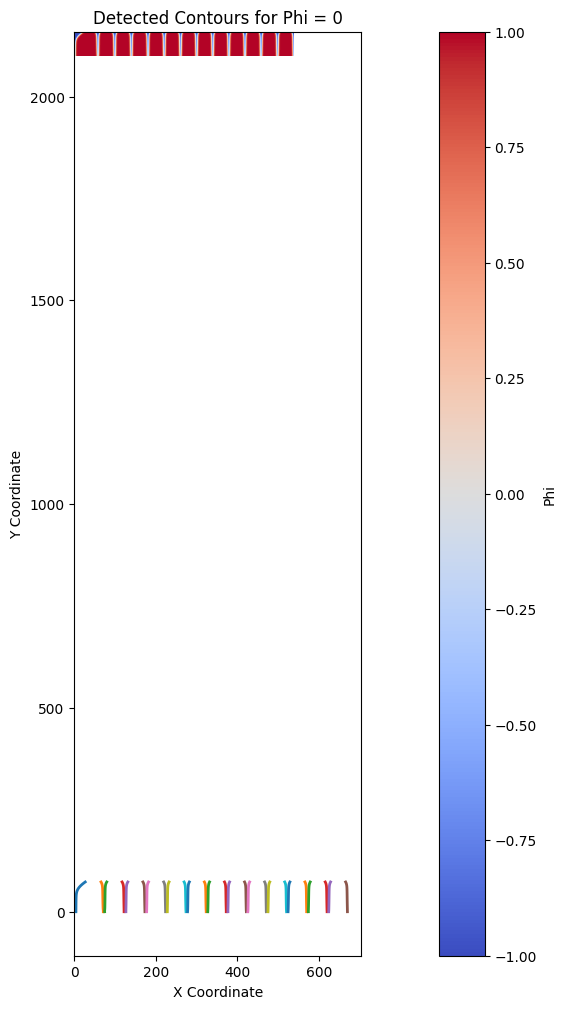

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift
import matplotlib.pyplot as plt
from skimage import measure
from scipy.interpolate import griddata



# Read the CSV file
df_phi_b = pd.read_csv('phi_b.csv')

# Extract the columns
phi = df_phi_b['Phi'].values
x = df_phi_b['Points:0'].values
y = df_phi_b['Points:1'].values
# Determine the grid dimensions (assuming a rectangular grid)
x_unique = np.unique(x)
y_unique = np.unique(y)
nx = len(x_unique)
ny = len(y_unique)



# Read the CSV file
df_phi_b = pd.read_csv('phi_b.csv')


# Extract the columns
phi = df_phi_b['Phi'].values
x = df_phi_b['Points:0'].values
y = df_phi_b['Points:1'].values

# Filter the data based on the condition
# condition = (y > 1810) & (y < 2270)
condition = (y > 2100) & (y < 2160)
phi_filtered = phi[condition]
x_filtered = x[condition]
y_filtered = y[condition]

# Determine the grid dimensions (assuming a rectangular grid)
x_unique = np.unique(x_filtered)
y_unique = np.unique(y_filtered)
nx = len(x_unique)
ny = len(y_unique)

# Create a meshgrid for the structured grid
X, Y = np.meshgrid(x_unique, y_unique)

# Interpolate the data to fit the grid
Z = griddata((x_filtered, y_filtered), phi_filtered, (X, Y), method='cubic')



# Plot the interpolated data on a structured grid
plt.figure(figsize=(20, 12))
plt.imshow(Z, extent=(x_filtered.min(), x_filtered.max(), y_filtered.min(), y_filtered.max()), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Phi')
plt.title('Interpolated Data on Structured Grid (Filtered)')
plt.xlabel('Points:0')
plt.ylabel('Points:1')
plt.show()


# Find contours at a constant value of 0
contours = measure.find_contours(Z, 0)


# Plot the contours
plt.figure(figsize=(20, 12))
plt.imshow(Z, cmap='coolwarm', origin='lower', extent=[x_filtered.min(), x_filtered.max(), y_filtered.min(), y_filtered.max()])
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)  # contour[:, 1] is x, contour[:, 0] is y
plt.title('Detected Contours for Phi = 0')
plt.colorbar(label='Phi')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


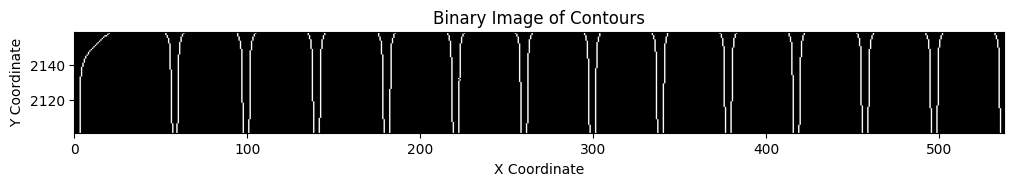

In [51]:

# Find contours at a constant value of 0
contours = measure.find_contours(Z, 0)

# Create a binary image to represent the contours
binary_image = np.zeros_like(Z)
for contour in contours:
    contour = np.round(contour).astype(int)
    binary_image[contour[:, 0], contour[:, 1]] = 1


# Plot the binary image
plt.figure(figsize=(12, 6))
plt.imshow(binary_image, cmap='gray', origin='lower', extent=[x_filtered.min(), x_filtered.max(), y_filtered.min(), y_filtered.max()])
plt.title('Binary Image of Contours')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



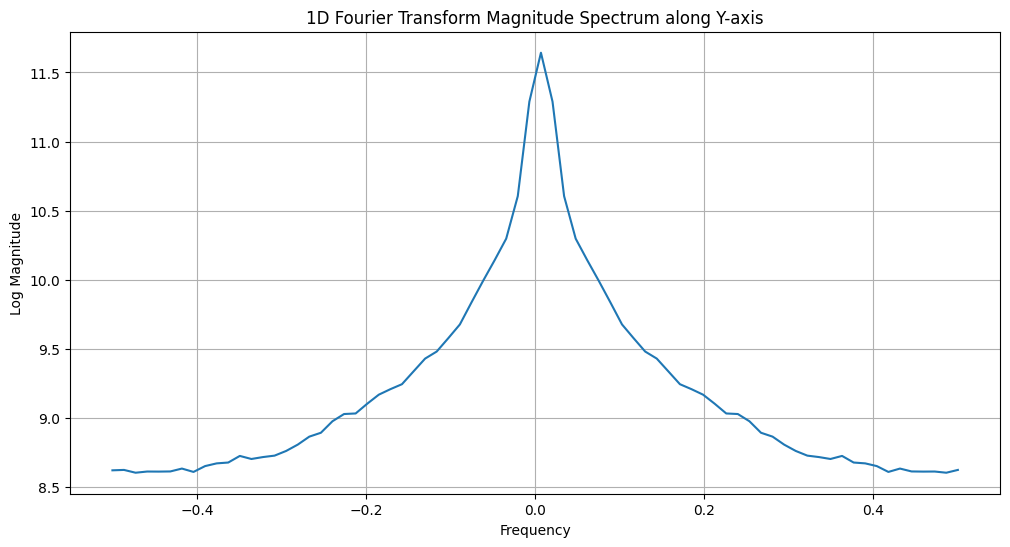

Estimated PDAS: -59.19999999999963


In [52]:

# Apply Fourier Transform to the binary image
fft_image = fft2(binary_image)
fft_image_shifted = fftshift(fft_image)
fft_magnitude = np.abs(fft_image_shifted)

# Compute the 1D Fourier transform by summing along the x-axis
fft_magnitude_1d = np.sum(fft_magnitude, axis=1)

# Plot the 1D Fourier Transform magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(-0.5, 0.5, len(fft_magnitude_1d)), np.log(fft_magnitude_1d + 1))
plt.title('1D Fourier Transform Magnitude Spectrum along Y-axis')
plt.xlabel('Frequency')
plt.ylabel('Log Magnitude')
plt.grid(True)
plt.show()

# Identify the dominant frequency, excluding the zero frequency component
midpoint = len(fft_magnitude_1d) // 2
fft_magnitude_1d[midpoint] = 0  # Zero out the DC component

peak_freq_index = np.argmax(fft_magnitude_1d)
dominant_frequency = (peak_freq_index - midpoint) / len(fft_magnitude_1d)

# Calculate the PDAS from the dominant frequency
d_y = (y_filtered.max() - y_filtered.min()) / (ny - 1)

# Convert the frequency to a wavelength (in pixels)
lambda_pixels = 1 / dominant_frequency if dominant_frequency != 0 else np.inf

# Convert wavelength to spatial domain (real units)
pdas = lambda_pixels * d_y if lambda_pixels != np.inf else np.nan

print(f"Estimated PDAS: {pdas}")

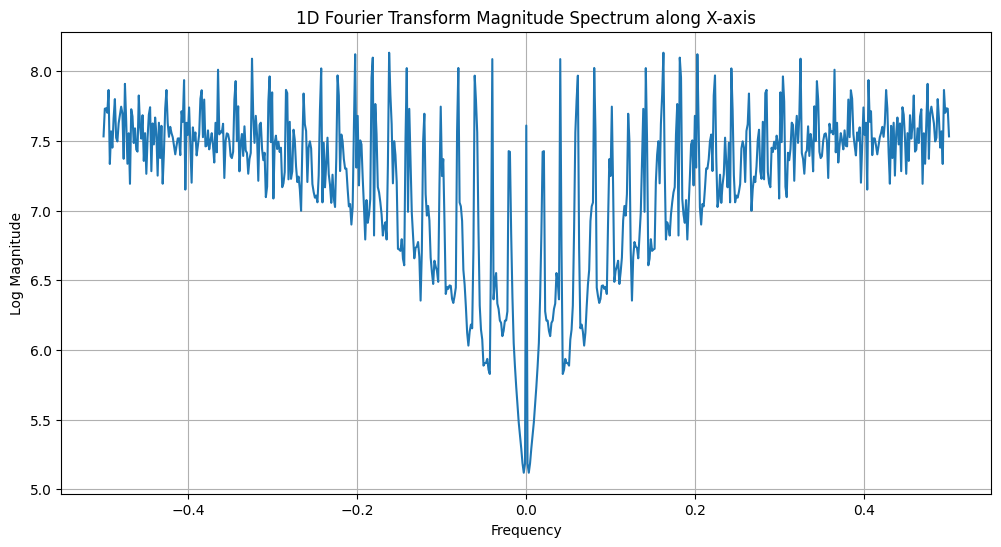

Estimated PDAS: 4.939449541284404


In [53]:
# Apply Fourier Transform to the binary image
fft_image = fft2(binary_image)
fft_image_shifted = fftshift(fft_image)
fft_magnitude = np.abs(fft_image_shifted)

# Compute the 1D Fourier transform by summing along the y-axis
fft_magnitude_1d = np.sum(fft_magnitude, axis=0)

# Plot the 1D Fourier Transform magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(-0.5, 0.5, len(fft_magnitude_1d)), np.log(fft_magnitude_1d + 1))
plt.title('1D Fourier Transform Magnitude Spectrum along X-axis')
plt.xlabel('Frequency')
plt.ylabel('Log Magnitude')
plt.grid(True)
plt.show()

# Identify the dominant frequency, excluding the zero frequency component
midpoint = len(fft_magnitude_1d) // 2
fft_magnitude_1d[midpoint] = 0  # Zero out the DC component

# Find the peak frequency index
peak_freq_index = np.argmax(fft_magnitude_1d)
dominant_frequency = (peak_freq_index - midpoint) / len(fft_magnitude_1d)

# Ensure the dominant frequency is positive
if dominant_frequency < 0:
    dominant_frequency = -dominant_frequency

# Calculate the PDAS from the dominant frequency
d_x = (x_filtered.max() - x_filtered.min()) / (nx - 1)

# Convert the frequency to a wavelength (in pixels)
lambda_pixels = 1 / dominant_frequency if dominant_frequency != 0 else np.inf

# Convert wavelength to spatial domain (real units)
pdas = lambda_pixels * d_x if lambda_pixels != np.inf else np.nan

print(f"Estimated PDAS: {pdas}")